<a href="https://colab.research.google.com/github/ronsuitNES23/ronsuitNES23/blob/main/Diamond_Prices_and_Carats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Path

In [1]:
%cd /content/drive/MyDrive/Statistics and Descriptive Analytics/Linear Regression

/content/drive/MyDrive/Statistics and Descriptive Analytics/Linear Regression


## Libraries

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## DataSet

In [3]:
df = pd.read_csv('diamond.csv')
df.head()
df.describe()

,Unnamed: 0,carat,price
count,308.000000,308.000000,308.000000
mean,154.500000,0.630909,5019.483766
std,89.056162,0.277183,3403.115715
min,1.000000,0.180000,638.000000
25%,77.750000,0.350000,1625.000000
50%,154.500000,0.620000,4215.000000
75%,231.250000,0.850000,7446.000000
max,308.000000,1.100000,16008.000000


## Data Prep

In [4]:
# isolating x and y
y = df.price
X = df.carat

In [5]:
# Adding a Constant
X = sm.add_constant(X)
X.head()

,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


## Linear Regression

In [6]:
# Regression model
model1 = sm.OLS(endog= y, exog= X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          3.04e-150
Time:                        09:49:54   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'Price')

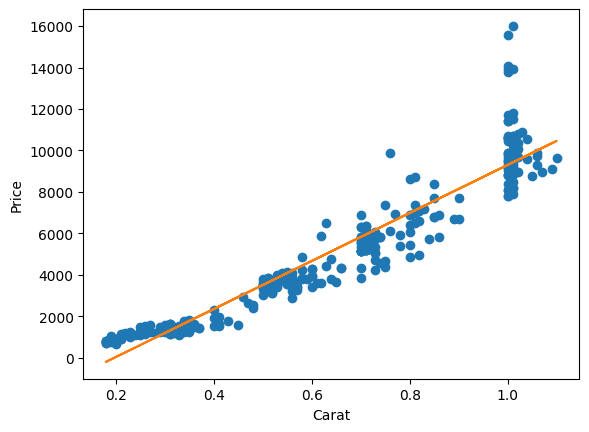

In [7]:
#Plotting the line
X = df.carat
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b *X + a)
plt.xlabel('Carat')
plt.ylabel('Price')

In [8]:
df2 = pd.read_csv('diamond_new.csv')
df2.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df2.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
y = df2.price
x = df2.carat


In [11]:
x = sm.add_constant(x)
x.head()

,const,carat
0,1.0,0.23
1,1.0,0.21
2,1.0,0.23
3,1.0,0.29
4,1.0,0.31


In [12]:
model2 = sm.OLS(endog= y, exog= x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          3.04e-150
Time:                        09:49:55   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

## Linear Regression Wirh Dummy Variables

In [13]:
# Looking at the carat variable, the bianry variable to breated
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [15]:
# Creating the the binary variable
df['carat_binary'] = np.where(df.carat > 0.6, 1, 0)
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [16]:
#Create Linear regression with binary variable
y = df.price
X = df.carat_binary

X = sm.add_constant(X)
X.head()

model3 = sm.OLS(endog= y, exog= X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.79e-73
Time:                        11:50:50   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

In [17]:
df['intercept'] = 1

In [18]:
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary,intercept
0,1,0.30,D,VS2,GIA,1302,0,1
1,2,0.30,E,VS1,GIA,1510,0,1
2,3,0.30,G,VVS1,GIA,1510,0,1
3,4,0.30,G,VS1,GIA,1260,0,1
4,5,0.31,D,VS1,GIA,1641,0,1


In [29]:
Y = df['price']
X = df[['intercept', 'carat_binary']]
model4 = sm.OLS(Y, X).fit()


In [30]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           1.79e-73
Time:                        11:59:02   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     2225.2303    161.442     13.783   